# 第6章 广义线性模型

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set()
%matplotlib inline
%precision 3

'%.3f'

### 6-1-9 实现二项分布

In [2]:
stats.binom.pmf(k=1,n=2,p=.5)#参数依次为成功次数、试验次数、成功概率

0.5

In [3]:
np.random.seed(1)
stats.binom.rvs(n=10,p=.2,size=5)

array([2, 3, 0, 1, 1])

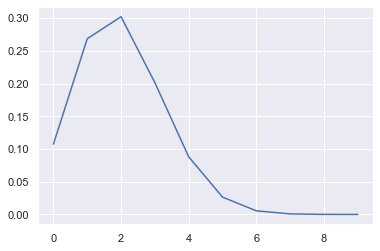

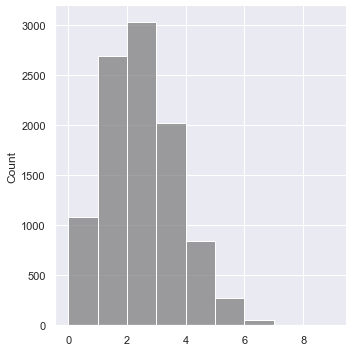

In [10]:
#N=10,p=.2的二项分布
binomial = stats.binom(n=10,p=.2)
#生成随机数
np.random.seed(1)
rvs_binomial = binomial.rvs(size=10000)
#概率质量函数
m = np.arange(0,10,1)
pmf_binomial = binomial.pmf(k=m)
#绘制样本直方图与概率质量函数的图形
plt.plot(m,pmf_binomial,color='b')
sns.displot(rvs_binomial,bins=m,kde=False,color='gray')

### 6-1-14 实现 泊松分布

In [14]:
#强度为5，样本值为2的概率
stats.poisson.pmf(k=2,mu=5)

0.08422433748856832

In [15]:
#从强度为2的泊松分布中生成随机数
np.random.seed(1)
stats.poisson.rvs(mu=2,size=5)

array([2, 1, 0, 1, 2])

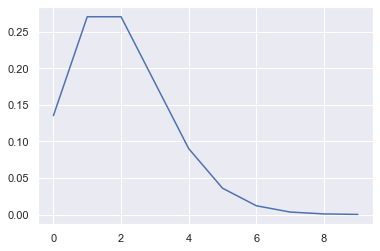

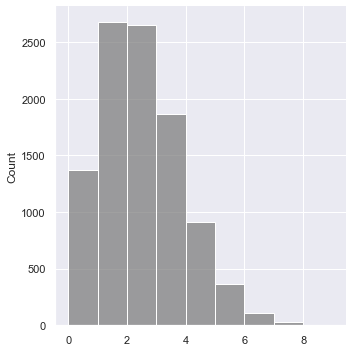

In [18]:
poisson = stats.poisson(mu=2)
np.random.seed(1)
rvs_poisson = poisson.rvs(size=10000)
pmf_poisson = poisson.pmf(k=m)
plt.plot(m,pmf_poisson)
sns.displot(rvs_poisson,bins=m,kde=False,color='gray')

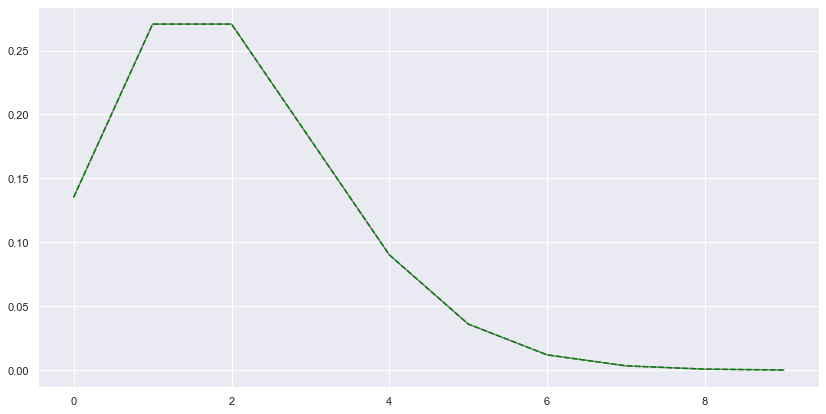

In [20]:
#对比二项分布和泊松分布关系
#N非常大但P非常小的二项分布
N = 100000000
p = 0.00000002
binomial_2 = stats.binom(n=N,p=p)
#概率质量函数
pmf_binomial_2 = binomial_2.pmf(k=m)
#绘制概率质量函数的图形
plt.figure(figsize=(14,7))
plt.plot(m,pmf_poisson,color='gray')
plt.plot(m,pmf_binomial_2,linestyle='--',color='green')

### 6-3-11 实现 读取数据并可视化

In [21]:
test_result = pd.read_csv('/Users/meininghang/Downloads/【源码】用Python动手学统计学/6-3-1-logistic-regression.csv')
test_result.head()

,hours,result
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


<AxesSubplot:xlabel='hours', ylabel='result'>

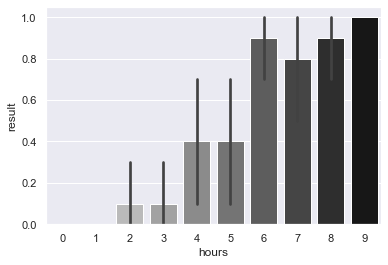

In [22]:
sns.barplot(x='hours',y='result',data=test_result,palette='gray_r')

In [23]:
test_result.groupby('hours').mean()

,result
hours,
0,0.0
1,0.0
2,0.1
3,0.1
4,0.4
5,0.4
6,0.9
7,0.8
8,0.9


### 6-3-12 实现 logistics回归

In [24]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [26]:
mod_glm = smf.glm(formula='result~hours',data=test_result,
                 family=sm.families.Binomial()).fit()

### 6-3-13 logistic回归的结果

In [27]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sat, 29 May 2021   Deviance:                       68.028
Time:                        22:13:54   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

### 6-3-14 模型选择

In [28]:
#空模型
mod_glm_null = smf.glm(
    'result~1',data=test_result,
    family=sm.families.Binomial()
).fit()

In [30]:
#AIC 
print('空模型：',mod_glm_null.aic.round(3))
print('包含解释变量的模型',mod_glm.aic.round(3))

空模型： 139.989
包含解释变量的模型 72.028


### 6-3-15 回归曲线

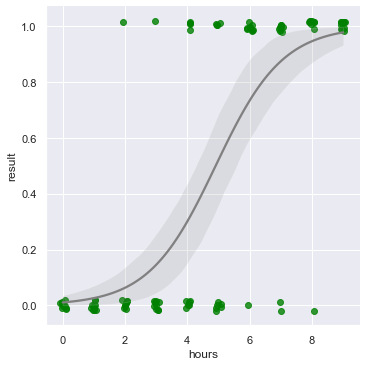

In [31]:
sns.lmplot(
    x = 'hours',y='result',
    data=test_result,
    logistic=True,
    scatter_kws={'color':'green'},
    line_kws={'color':'gray'},
    x_jitter=0.1,
    y_jitter=0.02
)

### 6-3-16 预测成功概率

In [32]:
exp_val = pd.DataFrame({
    'hours':np.arange(0,10,1)
})
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

### 6-3-19 logistic回归的系数与优势比的关系？

In [34]:
mod_glm.params['hours'].round(3)

0.929

In [35]:
np.exp(mod_glm.params['hours'])

2.531697877875776

## 6-4 广义线性模型的评估

In [36]:
test_result

,hours,result
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,9,1
96,9,1
97,9,1
98,9,1


In [37]:
mod_glm

### 6-4-4 皮尔逊残差

In [40]:
#预测的成功概率
pred = mod_glm.predict()
#响应变量（合格情况）
y = test_result.result
#皮尔逊残差
pearson_resid = (y-pred) / np.sqrt(pred * (1 - pred))
pearson_resid.head(3)

0   -0.102351
1   -0.102351
2   -0.102351
Name: result, dtype: float64

In [41]:
mod_glm.resid_pearson.head()

0   -0.102351
1   -0.102351
2   -0.102351
3   -0.102351
4   -0.102351
dtype: float64

In [43]:
#皮尔逊卡方统计量
mod_glm.pearson_chi2.round(3)

84.911

### 6-4-9 偏差残差

In [47]:
mod_glm.resid_deviance.head(3)

0   -0.144369
1   -0.144369
2   -0.144369
dtype: float64

### 6-5 泊松分布

概率分布为泊松分布、联系函数为对数函数的广义线性模型叫作泊松回归。解释变量可以有多个，连续型和分类型的解释变量也可以同时存在。

In [49]:
beer = pd.read_csv('/Users/meininghang/Downloads/【源码】用Python动手学统计学/6-5-1-poisson-regression.csv')
beer.tail()

,beer_number,temperature
25,17,31.8
26,2,7.6
27,2,6.2
28,4,10.1
29,16,31.3


### 6-5-5 实现泊松分布

In [50]:
mod_pois = smf.glm('beer_number~temperature',beer,
                  family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Sat, 29 May 2021   Deviance:                       5.1373
Time:                        22:38:22   Pearson chi2:                     5.40
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

### 6-5-6 模型选择

In [52]:
#AIC
mod_pois_null = smf.glm(
    'beer_number~1',
    data = beer,
    family = sm.families.Poisson()
).fit()

In [56]:
print('Null 空模型 ：',mod_pois_null.aic.round(3))
print('气温模型    ：   ',mod_pois.aic.round(3))

Null 空模型 ： 223.363
气温模型    ：    119.343


### 6-5-7 实现回归曲线

In [58]:
#计算预测值
x_plot = np.arange(0,37)
pred = mod_pois.predict(pd.DataFrame('temperature':x_plot))
#不含默认回归直线的lmplot
sns.lmplot(y='beer_number',x='temperature',
           data=beer,fit_reg=False,scatter_kws={'color':'green'})
#绘制出回归曲线
plt.plot(x_plot,pred,color='black')

SyntaxError: invalid syntax (<ipython-input-58-c41861b492c6>, line 3)